# Set de datos sobre Cancer Cerebral
### Por: *Marcos Figueroa - Álvaro Monsalve*  
### Tutores: *José Reyes- Sebástian Bustamante*
### Métodos de Aprendizajes Automáticos Aplicados
### IDVRV - Univesidad de Talca
---
### La columna de imagen define el nombre de la imagen y la columna de clase define si la imagen tiene tumor o no (1 = tumor, 0 = no tumor)
### 
### Los examenes son resonancias magneticas y esta es una referencia:
### ![brain](referenceimage.png)
---
---
## Referencia:
### Dataset Kaggle [BrainTumor](https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor)

In [95]:
# Primero es importante exportar las librerias necesarias para trabajar el archivo de tipo.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [96]:
# Impresión del dataset.
df_brain_tumor = pd.read_csv("brain_tumor.csv")

### Revisar si el dataset contiene datos erroneos

In [97]:
# Revisar la cantidad de datos perdidos, es decir, NaN (Not a Number) dentro de un dataframe de pandas
df_brain_tumor.isna().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

# Revisión de datos duplicados

In [98]:
print(df_brain_tumor.duplicated().sum())

0


# Describe

In [99]:
# Mas descriptores generales
df_general = df_brain_tumor.describe()

df_general.to_csv('archivo_general.csv', index=False)

# Info

In [100]:
df_brain_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

# Extrayendo un dataframe de otro

In [101]:
#Importar librería
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Excluir lo datos categoricos
df_numerico = df_brain_tumor.select_dtypes(include=[float])
df_no_numerico = df_brain_tumor.select_dtypes(exclude=[float])

#Escalar el dataframe
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)
df_final = pd.concat([df_no_numerico.reset_index(drop=True), df_normalizado], axis=1)
#print(df_final.head())
#
df_final.to_csv('dataset_normalizado.csv', index=False)
df_final.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,0.194705,0.212023,0.443074,0.274801,0.068211,0.010937,0.028236,0.475410,0.246092,0.603108,0.139694,0.981764,0.0
1,Image2,0,0.261489,0.276124,0.510114,0.674843,0.052278,0.007693,0.017951,0.797096,0.648383,0.773800,0.093527,0.997417,0.0
2,Image3,1,0.219003,0.392326,0.614200,0.001487,0.090618,0.016478,0.023280,0.012719,0.001173,0.230760,0.195261,0.972855,0.0
3,Image4,1,0.177300,0.329007,0.559750,0.001513,0.108202,0.021559,0.043805,0.012908,0.001192,0.196137,0.258588,0.941475,0.0
4,Image5,0,0.218223,0.249840,0.483677,0.370574,0.068403,0.011067,0.050836,0.564860,0.338854,0.560862,0.226679,0.960995,0.0


# Matriz de Confusión para diferentes K(3,5,7,9)

KeyError: "'Yellows' is not a known colormap name"

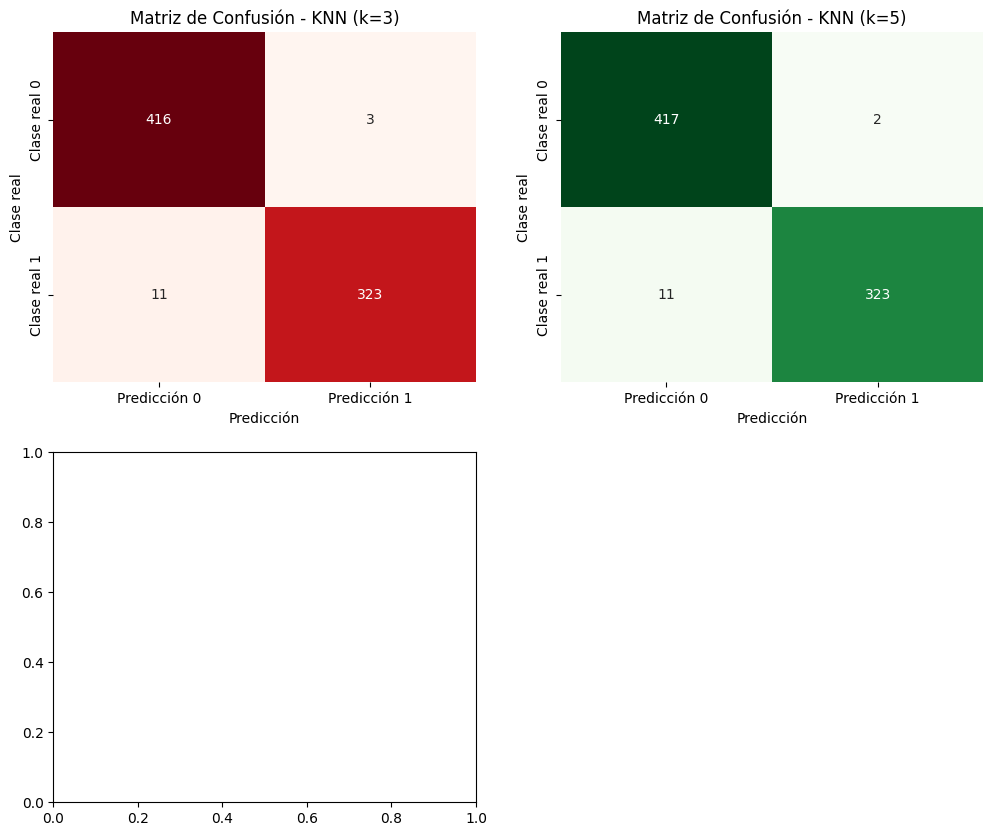

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Dividir el set de datos para entrenamiento
X = df_final.drop(['Class', 'Image'], axis=1)  # Características
y = df_final['Class']  # Etiqueta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [3, 5, 7, 9]
color_maps = ['Reds', 'Greens', 'Oranges', 'Purples']  

plt.figure(figsize=(12, 10))

for i, (k, cmap) in enumerate(zip(k_values, color_maps), 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Graficar matriz de confusión en un subplot con colores distintos
    plt.subplot(2, 2, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=[f'Predicción {i}' for i in range(conf_matrix.shape[1])],
                yticklabels=[f'Clase real {i}' for i in range(conf_matrix.shape[0])])
    plt.title(f'Matriz de Confusión - KNN (k={k})')
    plt.xlabel('Predicción')
    plt.ylabel('Clase real')

plt.tight_layout()
plt.show()